In [1]:
import pandas as pd
import numpy as np
import nltk
import re
import string
from nltk.tokenize import word_tokenize
from num2words import num2words
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [2]:
from docx import Document

In [3]:
T = Document('book2.docx')  ## Document() function reads docx file and stores it in the variable T

In [4]:
fullText = []
for paragraph in T.paragraphs:
    fullText.append(paragraph.text)

In [5]:
fullText[:10]

['WALDEN',
 '',
 'Economy',
 '',
 'When I wrote the following pages, or rather the bulk of them, I lived',
 'alone, in the woods, a mile from any neighbor, in a house which I had',
 'built myself, on the shore of Walden Pond, in Concord, Massachusetts,',
 'and earned my living by the labor of my hands only. I lived there two',
 'years and two months. At present I am a sojourner in civilized life',
 'again.']

In [6]:
exclude = set(string.punctuation)                                    #Set containing charachters to exclude

def remove_apostrophe(data):                                         # Function to remove apostrophe and other similar charachters
    data = np.char.replace(data,"’","")
    data = np.char.replace(data, "'", "")
    data = np.char.replace(data, "‘", "")
        
    return data                                                      # Returns updated text

def remove_punctuation(data):                                        # Function to remove punctuation,hyphen,etc..
    for i in (exclude):
        data = np.char.replace(data, i, ' ')
        #data = np.char.replace(data, " ", "")
    data = np.char.replace(data, ',', ' ')
    data = np.char.replace(data, "“", "")
    data = np.char.replace(data, '"', "")
    data = np.char.replace(data, "-", " ")
    
    return data

def convert_numbers(data):                                          #Converts numbers to words using num2words
    tokens = word_tokenize(str(data))
    new_text = ""
    for w in tokens:
        try:
            w = num2words(int(w))
        except:
            a = 0
        new_text = new_text + " " + w
   
    return new_text


In [7]:
new_list = []                                    # List data structure to store preprocessed data 
for data in fullText:                            #Loops over fullText to apply data preprocessing function
    data = remove_apostrophe(data)
    data = remove_punctuation(data)
    data = convert_numbers(data)
    new_list.append(data)                       # Preprocessed data is appended to new_list

In [8]:
new_list[:10]                                   # First 10 elements

[' WALDEN',
 '',
 ' Economy',
 '',
 ' When I wrote the following pages or rather the bulk of them I lived',
 ' alone in the woods a mile from any neighbor in a house which I had',
 ' built myself on the shore of Walden Pond in Concord Massachusetts',
 ' and earned my living by the labor of my hands only I lived there two',
 ' years and two months At present I am a sojourner in civilized life',
 ' again']

In [9]:
#Chapter heading were in BLOCK Letters, Remaining data stored in new_list_2
new_list_2 = []                             
for data in new_list:
    if not (data.isupper()):
        new_list_2.append(data)

In [10]:
documents = []
for item in new_list_2:
    if(len(item)!=0):
        documents.append(item)

In [11]:
#Imported SnowballStemmer to use in future algorithms

from nltk.stem.snowball import SnowballStemmer  
stemmer = SnowballStemmer("english")               

In [12]:
#Tokenizes and stems text 
def tokenize_and_stem(text):
   
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []

    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    
    return stems 

In [13]:
#Tokenizes data
def tokenize_only(text):

    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
   
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [14]:
## Implemented Functions defined above and stored text in List data Structure
Text_stemmed = []
Text_tokenized = []
for i in documents:
       
    allwords_stemmed = tokenize_and_stem(i)            #for each item in 'fullText', tokenize/stem
    Text_stemmed.extend(allwords_stemmed)              #extend the 'Text_stemmed' list
    
    allwords_tokenized = tokenize_only(i)              #only tokenizes
    Text_tokenized.extend(allwords_tokenized)          # extends Text_tokenize by adding newly tokenized list of words

In [15]:
Text_tokenized[:11]                                   # Tokenized words

['economy',
 'when',
 'i',
 'wrote',
 'the',
 'following',
 'pages',
 'or',
 'rather',
 'the',
 'bulk']

In [16]:
Words = pd.DataFrame(Text_tokenized,columns=['Words'])          #Created a dataframe out of Stemmed Words

In [17]:
Words['Words'].value_counts()                                 #Count of words

the           7323
and           4582
of            3490
to            3117
a             3037
              ... 
coincide         1
concur           1
requested        1
respecting       1
leakiest         1
Name: Words, Length: 11237, dtype: int64

In [18]:
#Count of words added to the dataframe with a new column

Counts = pd.DataFrame(Words['Words'].value_counts())
Counts = Counts.reset_index()
Counts = Counts.rename(columns={"index": "Words", "Words": "Counts"})
Counts.head(10)

,Words,Counts
0,the,7323
1,and,4582
2,of,3490
3,to,3117
4,a,3037
5,in,2059
6,i,1989
7,it,1711
8,is,1330
9,that,1321


In [19]:
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\drago/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\drago/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
stop = ['a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'all', 'almost', 'alone',
             'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amoungst', 'amount',
             'an', 'and', 'another', 'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere', 'are', 'around',
             'as', 'at', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before',
             'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 'between', 'beyond', 'bill', 'both',
             'bottom', 'but', 'by', 'call', 'can', 'cannot', 'cant', 'co', 'con', 'could', 'couldnt', 'cry', 'de',
             'describe', 'detail', 'did', 'do', 'does', 'doing', 'don', 'done', 'down', 'due', 'during', 'each', 'eg',
             'eight', 'either', 'eleven', 'else', 'elsewhere', 'empty', 'enough', 'etc', 'even', 'ever', 'every', 'everyone',
             'everything', 'everywhere', 'except', 'few', 'fifteen', 'fify', 'fill', 'find', 'fire', 'first', 'five', 'for',
             'former', 'formerly', 'forty', 'found', 'four', 'from', 'front', 'full', 'further', 'get', 'give', 'go', 'had',
             'has', 'hasnt', 'have', 'having', 'he', 'hence', 'her', 'here', 'hereafter', 'hereby', 'herein', 'hereupon',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'however', 'hundred', 'i', 'ie', 'if', 'in', 'inc', 'indeed',
             'interest', 'into', 'is', 'it', 'its', 'itself', 'just', 'keep', 'last', 'latter', 'latterly', 'least', 'less',
             'ltd', 'made', 'many', 'may', 'me', 'meanwhile', 'might', 'mill', 'mine', 'more', 'moreover', 'most', 'mostly',
             'move', 'much', 'must', 'my', 'myself', 'name', 'namely', 'neither', 'never', 'nevertheless', 'next', 'nine',
             'no', 'nobody', 'none', 'noone', 'nor', 'not', 'nothing', 'now', 'nowhere', 'of', 'off', 'often', 'on', 'once',
             'one', 'only', 'onto', 'or', 'other', 'others', 'otherwise', 'our', 'ours', 'ourselves', 'out', 'over', 'own',
             'part', 'per', 'perhaps', 'please', 'put', 'rather', 're', 's', 'same', 'see', 'seem', 'seemed', 'seeming',
             'seems', 'serious', 'several', 'she', 'should', 'show', 'side', 'since', 'sincere', 'six', 'sixty', 'so', 
             'some', 'somehow', 'someone', 'something', 'sometime', 'sometimes', 'somewhere', 'still', 'such', 'system',
             't', 'take', 'ten', 'than', 'that', 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'thence', 'there',
             'thereafter', 'thereby', 'therefore', 'therein', 'thereupon', 'these', 'they', 'thickv', 'thin', 'third', 'this',
             'those', 'though', 'three', 'through', 'throughout', 'thru', 'thus', 'to', 'together', 'too', 'top', 'toward',
             'towards', 'twelve', 'twenty', 'two', 'un', 'under', 'until', 'up', 'upon', 'us', 'very', 'via', 'was', 'we',
             'well', 'were', 'what', 'whatever', 'when', 'whence', 'whenever', 'where', 'whereafter', 'whereas', 'whereby',
             'wherein', 'whereupon', 'wherever', 'whether', 'which', 'while', 'whither', 'who', 'whoever', 'whole', 'whom',
             'whose', 'why', 'will', 'with', 'within', 'without', 'would', 'yet', 'you', 'your', 'yours', 'yourself',
             'yourselves','click','nineteen','said'
       ]

stop_words = stopwords.words('english')
stop_words.extend(stop)
stop = set(stop_words)

In [21]:
# Function to remove all the stop words present in the data
def clean(data):
    stop_free = " ".join([i for i in data.lower().split() if i not in stop])
    return stop_free

In [22]:
# Data Preprocessing on the newly created data having no stop word
new_list_removed_stopwords = []
for data in fullText:
    data = remove_apostrophe(data)
    data = remove_punctuation(data)
    data = convert_numbers(data)
    data = clean(data)
    
    new_list_removed_stopwords.append(data)

In [23]:
#Two List are created

Text_stemmed_removed_stopwords = [] #Contains Stemmed words having no stopwords
Text_tokenized_removed_stopword = [] #Contains Tokenized Words having no stopwords
for i in new_list_removed_stopwords:
    allwords_stemmed = tokenize_and_stem(i) #for each item in 'fullText', tokenize/stem
    Text_stemmed_removed_stopwords.extend(allwords_stemmed) #extend the 'Text_stemmed' list
    
    allwords_tokenized = tokenize_only(i)
    Text_tokenized_removed_stopword.extend(allwords_tokenized)

In [24]:
Words_nostop = pd.DataFrame(Text_stemmed_removed_stopwords,columns=['Words'])  #Converted Stemmed List into a Dataframe

In [25]:
Words_nostop['Words'].value_counts() #Count of Words

man        372
like       328
day        275
men        249
hous       241
          ... 
discret      1
disgorg      1
pillow       1
chant        1
slower       1
Name: Words, Length: 7077, dtype: int64

In [26]:
#Created New Columns "Counts" which stores Count of all the words
Counts_new = pd.DataFrame(Words_nostop['Words'].value_counts())
Counts_new = Counts_new.reset_index()
Counts_new = Counts_new.rename(columns={"index": "Words", "Words": "Counts"})
Counts_new.head(10)

,Words,Counts
0,man,372
1,like,328
2,day,275
3,men,249
4,hous,241
5,live,238
6,wood,232
7,pond,226
8,time,209
9,life,204


In [27]:
tagged = nltk.pos_tag(Counts_new['Words'])

In [28]:
tags = [obj[1] for obj in tagged]

In [29]:
Counts_new['Tags'] = tags

In [30]:
Counts_new.head(5)

,Words,Counts,Tags
0,man,372,NN
1,like,328,IN
2,day,275,NN
3,men,249,NNS
4,hous,241,JJ


In [31]:
from nltk.corpus import wordnet

In [32]:
word_list = []
word_type = []
word_type_2 = []
for word in Text_tokenized_removed_stopword:
    syns = wordnet.synsets(word)
    word_list.append(word)
    if(syns):
        word_type.append(syns[0].lexname().split('.')[0])
        word_type_2.append(syns[0].lexname())

    else:
        word_type.append('None')
        word_type_2.append('None')

    #print(word, syns[0].lexname().split('.')[0]) if syns else (word, None)

In [33]:
WORD_TYPES = pd.DataFrame(word_list,columns=['Words'])
WORD_TYPES['Type'] =  word_type
WORD_TYPES['Type_Detail'] =  word_type_2

tagged = nltk.pos_tag(WORD_TYPES['Words'])
WORD_TYPES['Pos_Tag'] = [obj[1] for obj in tagged]
#WORD_TYPES = WORD_TYPES.rename(columns={"index": "Words", "Words": "Counts"})
#Counts_new.head(10)

In [34]:
Noun_Verb = WORD_TYPES[(WORD_TYPES['Type']== "verb") | (WORD_TYPES['Type']== "noun") ]

In [35]:
Noun_Verb.reset_index(drop=True,inplace=True)

In [36]:
Noun_Verb.head(10)

,Words,Type,Type_Detail,Pos_Tag
0,economy,noun,noun.group,NN
1,wrote,verb,verb.creation,VBD
2,following,noun,noun.group,VBG
3,pages,noun,noun.communication,NNS
4,bulk,noun,noun.attribute,VBP
5,lived,verb,verb.stative,VBN
6,woods,noun,noun.group,NNS
7,mile,noun,noun.quantity,IN
8,neighbor,noun,noun.person,NN
9,house,noun,noun.artifact,NN


In [37]:
Noun_Verb[Noun_Verb['Type']=='noun']['Type_Detail'].unique()

array(['noun.group', 'noun.communication', 'noun.attribute',
       'noun.quantity', 'noun.person', 'noun.artifact', 'noun.object',
       'noun.location', 'noun.cognition', 'noun.act', 'noun.time',
       'noun.state', 'noun.relation', 'noun.possession', 'noun.Tops',
       'noun.plant', 'noun.food', 'noun.feeling', 'noun.event',
       'noun.body', 'noun.process', 'noun.substance', 'noun.animal',
       'noun.shape', 'noun.phenomenon', 'noun.motive'], dtype=object)

In [38]:
Noun_Verb[Noun_Verb['Type']=='verb']['Type_Detail'].unique()

array(['verb.creation', 'verb.stative', 'verb.possession', 'verb.social',
       'verb.motion', 'verb.perception', 'verb.cognition',
       'verb.communication', 'verb.consumption', 'verb.change',
       'verb.contact', 'verb.body', 'verb.emotion', 'verb.competition',
       'verb.weather'], dtype=object)

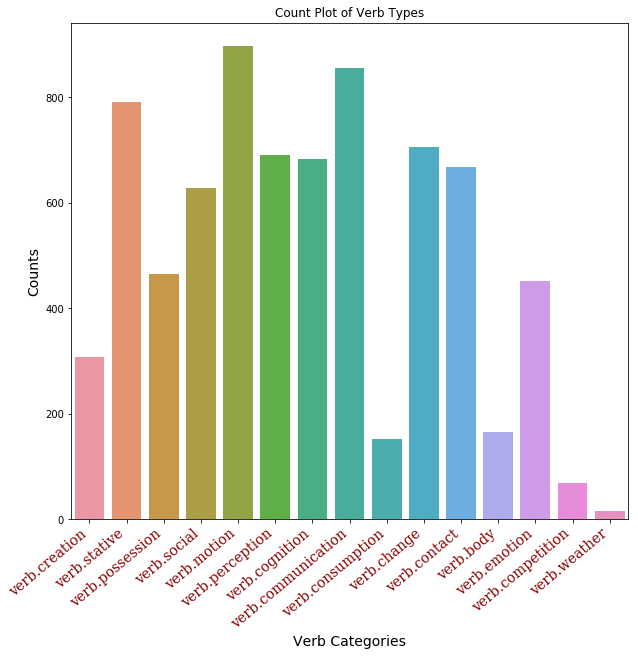

In [39]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 14,
        }


plt.figure(figsize=(9,9))
ax = sns.countplot(x="Type_Detail", data=Noun_Verb[Noun_Verb['Type']=='verb'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontdict=font)
plt.tight_layout()
plt.xlabel('Verb Categories',fontdict={'size':14})
plt.ylabel('Counts',fontdict={'size':14})
plt.title('Count Plot of Verb Types')

plt.show()


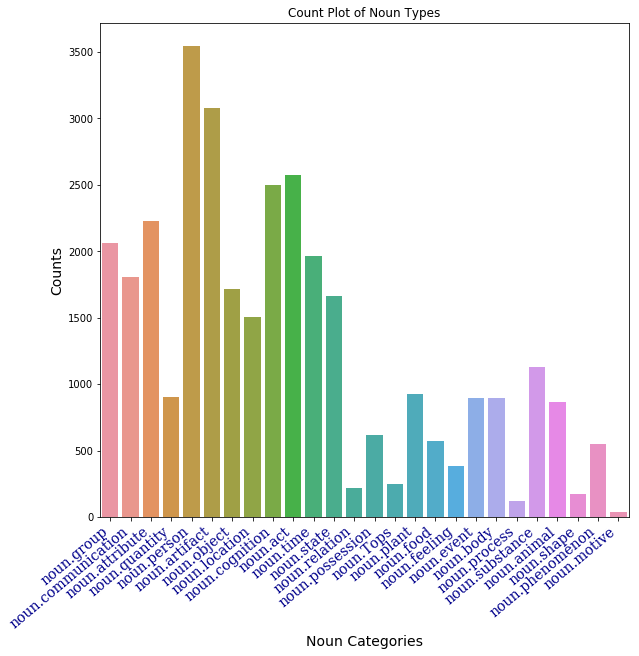

In [40]:
font = {'family': 'serif',
        'color':  'darkblue',
        'weight': 'normal',
        'size': 14,
        }


plt.figure(figsize=(9,9))
ax = sns.countplot(x="Type_Detail", data=Noun_Verb[Noun_Verb['Type']=='noun'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontdict=font)
plt.tight_layout()
plt.xlabel('Noun Categories',fontdict={'size':14})
plt.ylabel('Counts',fontdict={'size':14})
plt.title('Count Plot of Noun Types')
plt.show()


In [41]:
Noun_Verb['Type_Detail'].value_counts()

noun.person           3540
noun.artifact         3075
noun.act              2576
noun.cognition        2500
noun.attribute        2229
noun.group            2062
noun.time             1962
noun.communication    1806
noun.object           1715
noun.state            1660
noun.location         1505
noun.substance        1131
noun.plant             924
noun.quantity          906
noun.event             899
noun.body              896
verb.motion            896
noun.animal            869
verb.communication     856
verb.stative           790
verb.change            706
verb.perception        690
verb.cognition         683
verb.contact           668
verb.social            627
noun.possession        618
noun.food              574
noun.phenomenon        547
verb.possession        465
verb.emotion           452
noun.feeling           382
verb.creation          307
noun.Tops              245
noun.relation          219
noun.shape             176
verb.body              166
verb.consumption       153
n

In [42]:
def pre_process(data):
    data = tokenize_only(data)
    data = nltk.pos_tag(data)
    return data

In [43]:
new_list_2[:5]

['',
 ' Economy',
 '',
 ' When I wrote the following pages or rather the bulk of them I lived',
 ' alone in the woods a mile from any neighbor in a house which I had']

In [44]:
pos_tagged_list = []
for item in documents:
    pos_tagged_list.append(pre_process(item))

In [45]:
pos_tagged_list[:2]

[[('economy', 'NN')],
 [('when', 'WRB'),
  ('i', 'JJ'),
  ('wrote', 'VBD'),
  ('the', 'DT'),
  ('following', 'JJ'),
  ('pages', 'NNS'),
  ('or', 'CC'),
  ('rather', 'RB'),
  ('the', 'DT'),
  ('bulk', 'NN'),
  ('of', 'IN'),
  ('them', 'PRP'),
  ('i', 'VBP'),
  ('lived', 'VBD')]]

In [46]:
pattern = 'NP: {<DT>?<JJ>*<NN>}'

In [47]:
parser = nltk.RegexpParser(pattern)
parsed = []
for item in pos_tagged_list:
    par = parser.parse(item)
    parsed.append(par)

In [48]:
print(parser.parse(pos_tagged_list[1]))

(S
  when/WRB
  i/JJ
  wrote/VBD
  the/DT
  following/JJ
  pages/NNS
  or/CC
  rather/RB
  (NP the/DT bulk/NN)
  of/IN
  them/PRP
  i/VBP
  lived/VBD)


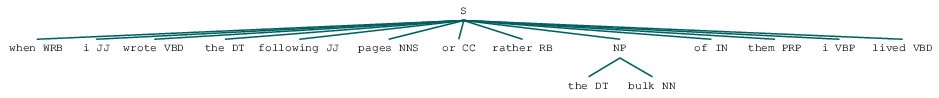

In [49]:
parser.parse(pos_tagged_list[1])

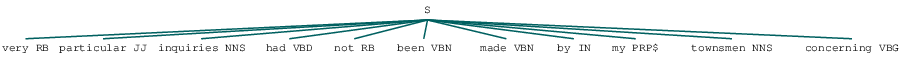

In [50]:
parser.parse(pos_tagged_list[8])

In [63]:
parsed[:5]

[Tree('S', [Tree('NP', [('economy', 'NN')])]),
 Tree('S', [('when', 'WRB'), ('i', 'JJ'), ('wrote', 'VBD'), ('the', 'DT'), ('following', 'JJ'), ('pages', 'NNS'), ('or', 'CC'), ('rather', 'RB'), Tree('NP', [('the', 'DT'), ('bulk', 'NN')]), ('of', 'IN'), ('them', 'PRP'), ('i', 'VBP'), ('lived', 'VBD')]),
 Tree('S', [('alone', 'RB'), ('in', 'IN'), ('the', 'DT'), ('woods', 'NNS'), Tree('NP', [('a', 'DT'), ('mile', 'NN')]), ('from', 'IN'), Tree('NP', [('any', 'DT'), ('neighbor', 'NN')]), ('in', 'IN'), Tree('NP', [('a', 'DT'), ('house', 'NN')]), ('which', 'WDT'), Tree('NP', [('i', 'NN')]), ('had', 'VBD')]),
 Tree('S', [('built', 'VBN'), ('myself', 'PRP'), ('on', 'IN'), Tree('NP', [('the', 'DT'), ('shore', 'NN')]), ('of', 'IN'), Tree('NP', [('walden', 'JJ'), ('pond', 'NN')]), ('in', 'IN'), Tree('NP', [('concord', 'NN')]), Tree('NP', [('massachusetts', 'NN')])]),
 Tree('S', [('and', 'CC'), ('earned', 'VBD'), ('my', 'PRP$'), Tree('NP', [('living', 'NN')]), ('by', 'IN'), Tree('NP', [('the', 'DT')

In [52]:
from nltk.chunk import conlltags2tree, tree2conlltags
from pprint import pprint


In [53]:
IOB_tagged_list = []
for item in parsed:
    iob_tagged = tree2conlltags(item)
    IOB_tagged_list.append(iob_tagged)

In [54]:
IOB_tagged_list[1]

[('when', 'WRB', 'O'),
 ('i', 'JJ', 'O'),
 ('wrote', 'VBD', 'O'),
 ('the', 'DT', 'O'),
 ('following', 'JJ', 'O'),
 ('pages', 'NNS', 'O'),
 ('or', 'CC', 'O'),
 ('rather', 'RB', 'O'),
 ('the', 'DT', 'B-NP'),
 ('bulk', 'NN', 'I-NP'),
 ('of', 'IN', 'O'),
 ('them', 'PRP', 'O'),
 ('i', 'VBP', 'O'),
 ('lived', 'VBD', 'O')]

In [55]:
import spacy
nlp = spacy.load('en_core_web_sm')


In [56]:
#import spacy
#from spacy import displacy
#rom collections import Counter
#import en_core_web_sm
#nlp = en_core_web_sm.load()

In [57]:
example = new_list_2[5]
### example = 'built myself on the shore of Walden Pond in Concord Massachusetts'
eg = nlp(example)
print(eg.ents)

(Walden Pond, Concord, Massachusetts)


In [58]:
for entity in eg.ents:
    print(entity.text + ' - ' + entity.label_ + ' - ' + str(spacy.explain(entity.label_)))

Walden Pond - GPE - Countries, cities, states
Concord - GPE - Countries, cities, states
Massachusetts - GPE - Countries, cities, states


In [59]:
entities_list = []

for item in new_list_2:
    if(len(item)>0):
        entities = nlp(item)
        for entity in entities.ents:
            entity_text = entity.text
            entity_label = entity.label_
            entity_label_description = str(spacy.explain(entity.label_))
            entities_list.append((item,entity_text,entity_label,entity_label_description))
            
                                           

In [60]:
Entities_List = pd.DataFrame(entities_list,columns=['item','entity_text','entity_label','entity_label_description'])


In [61]:
pd.set_option('display.max_rows', 0)
#pd.set_option('display.max_columns', 1000)
#pd.set_option('display.width', 1500)
pd.options.display.max_colwidth = 100


In [62]:
Entities_List

,item,entity_text,entity_label,entity_label_description
0,alone in the woods a mile from any neighbor in a house which I had,a mile,QUANTITY,"Measurements, as of weight or distance"
1,built myself on the shore of Walden Pond in Concord Massachusetts,Walden Pond,GPE,"Countries, cities, states"
2,built myself on the shore of Walden Pond in Concord Massachusetts,Concord,GPE,"Countries, cities, states"
3,built myself on the shore of Walden Pond in Concord Massachusetts,Massachusetts,GPE,"Countries, cities, states"
4,and earned my living by the labor of my hands only I lived there two,two,CARDINAL,Numerals that do not fall under another type
5,years and two months At present I am a sojourner in civilized life,two months,DATE,Absolute or relative dates or periods
6,these questions in this book In most books the I or first person,first,ORDINAL,"""first"", ""second"", etc."
7,all always the first person that is speaking I should not talk so,first,ORDINAL,"""first"", ""second"", etc."
8,experience Moreover I on my side require of every writer first or,first,ORDINAL,"""first"", ""second"", etc."
9,I would fain say something not so much concerning the Chinese and,Chinese,NORP,Nationalities or religious or political groups
